# Parità

Import librerie necessarie
- `numpy` per il calcolo scientifico con le matrici
- `train_test_split` da `sklearn` per dividere il dataset tra train e test
- `keras` per la rete di deep learning
- `matplotlib` per creare i grafici

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

Creiamo il dataset con numeri randomici

In [39]:
numero_test = 10000
X = np.random.randint(0, 5000, size=numero_test)
y = X % 2  # 0 per pari, 1 per dispari

Prepara i dati convertendo il numero da **intero** a **matrice a indice 10** contenente i 10 bit del numero in formato binario.

In [40]:
X_binary = np.array([list(map(int, np.binary_repr(x, width=16))) for x in X])

Divide il dataset in train e test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

Crea il modello di **rete neurale**  
- **1** layer da **1** neurone,
- dimensione della matrice di ingresso = 10,
- funzione di attivazione = sigmoide,
- ottimizzatore = algoritmo Adam

In [42]:
model = Sequential()
model.add(Dense(1, input_dim=16, activation='sigmoid'))  # Output: 0-1 (pari-dispari)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crea il grafico di visualizzazione della rete

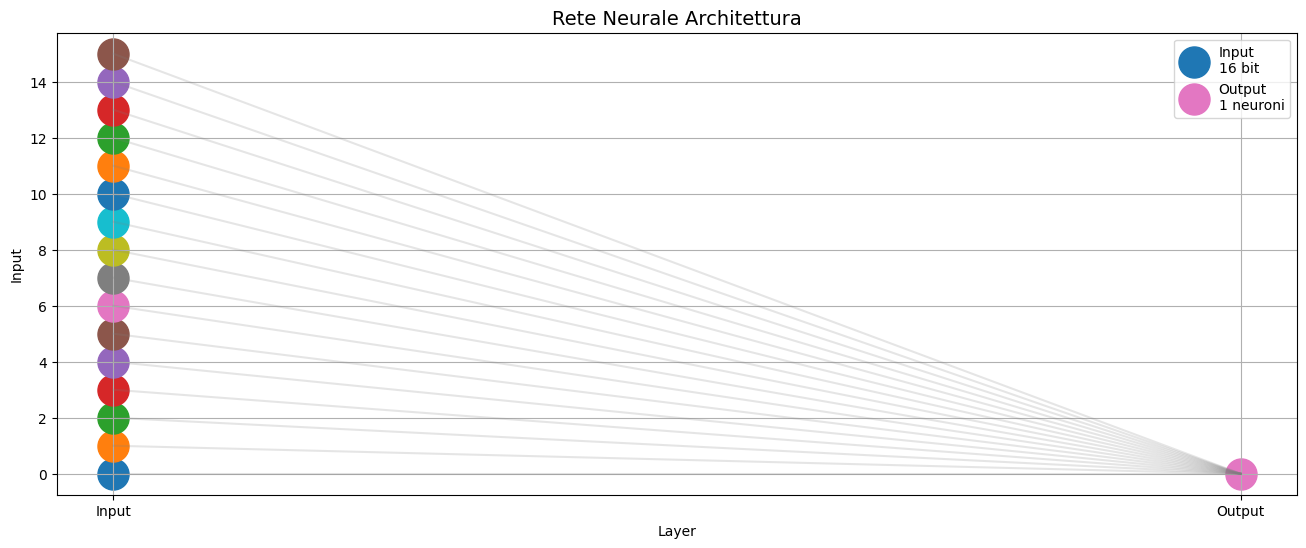

In [43]:
def plot_ann(model):
    layers = [layer.units for layer in model.layers if hasattr(layer, 'units')]
    layers.insert(0, model.input_shape[1])  # Aggiunge l'input

    plt.figure(figsize=(16, 6))
    for i, units in enumerate(layers):
        layer_name = f'Layer {i}'
        if i == 0:
            layer_name = 'Input'
        elif i == len(layers) - 1:
            layer_name = 'Output'

        # Disegna i neuroni
        for j in range(units):
          if i == 0:
            plt.scatter(i, j, s=500, label=f'{layer_name}\n{units} bit' if j == 0 else "")
          else:
            plt.scatter(i, j, s=500, label=f'{layer_name}\n{units} neuroni' if j == 0 else "")

    # Collegamenti tra neuroni (semplificato)
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                plt.plot([i, i + 1], [j, k], 'gray', alpha=0.2)

    plt.title("Rete Neurale Architettura", fontsize=14)
    plt.xlabel("Layer")
    plt.ylabel("Input")
    plt.xticks(range(len(layers)), ['Input'] + [f'Hidden {i}' for i in range(1, len(layers)-1)] + ['Output'])
    plt.grid(True)
    plt.legend()
    plt.show()

plot_ann(model)

Addestriamo il modello di rete neurale tramite dati di train.
- Numero di epoche di addestramento = 20

In [44]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5983 - loss: 0.6621 - val_accuracy: 0.6975 - val_loss: 0.6032
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7242 - loss: 0.5929 - val_accuracy: 0.8285 - val_loss: 0.5447
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.5385 - val_accuracy: 0.9445 - val_loss: 0.4949
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.4883 - val_accuracy: 0.9945 - val_loss: 0.4513
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.4449 - val_accuracy: 1.0000 - val_loss: 0.4129
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.4067 - val_accuracy: 1.0000 - val_loss: 0.3786
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3715 - val_accuracy: 1.0000 - val_loss: 0.3479
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3410 - val_accuracy: 1.

Mostriamo l'andamento grafico della perdita e dell'accuratezza nelle diverse epoche

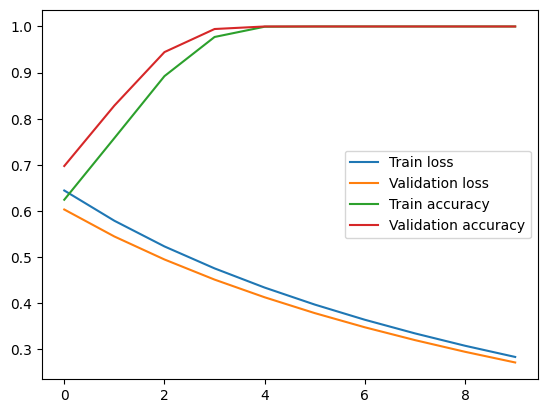

In [45]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

Valuta l'accuratezza del modello

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Perdita sul test set: {loss:.4f}\nAccuracy sul test set: {accuracy:.4f}")

Perdita sul test set: 0.2716
Accuracy sul test set: 1.0000


Eseguiamo un test con diversi numeri

In [47]:
test_numbers = np.random.randint(0, 65535, 25)

def predict_parity(number):
    binary = np.array([list(map(int, np.binary_repr(number, width=16)))])
    prediction = model.predict(binary)
    return "pari" if prediction < 0.5 else "dispari"

for num in test_numbers:
    print(f"{num} è {predict_parity(num)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
40009 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
39621 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
715 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
47036 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
13456 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
43849 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
53513 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
38503 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
30827 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5200 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
28046 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1726 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7775 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
54005 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
62769 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
27666 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
58089 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2726 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
44792 è pari
1/1 